# Data Mining in der technischen Anwendung
## Übungsblatt 03

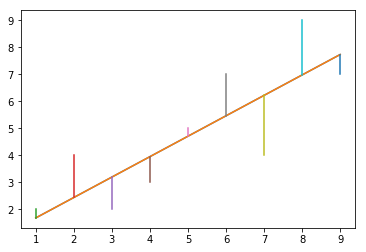

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures 
import pylab
pylab.show()

### Aufgabe 1: Lineare Regression

In dieser Aufgabe sollen Sie sich näher mit linearer Regression befassen. Gegeben sind *m* Datenpunkte im $\mathbb{R^2}$ (siehe Tabelle 1) und das allgemeine lineare Regressionsmodell: $y_0 = a_0 + a_1*x_1$ für i = 1 $\ldots$ m

|**x**|**y**|
| --- | --- |
|  1  |  2  |
|  2  |  4  |    
|  3  |  2  |
|  4  |  3  |
|  5  |  5  |
|  6  |  7  |
|  7  |  4  |
|  8  |  9  |
|  9  |  7  |

$a)$ Stellen Sie die zu minimierende Funktion (bzgl. des euklidischen Fehlermaßes) auf, um die Regressionsgerade auf den oben angegebenen Punkten zu finden.

$E[x,y] = \sum_{i=0}^{n}(y_i-(a_0+a_1 x_i))^2 $

$b)$ Geben Sie als Lösung eine allgemeine Gleichung zur Bestimmung der Regressionsgerade im $\mathbb{R}^2$ an (mit Rechenweg). Lösen Sie daraufhin für die gegebenen Werte (siehe Tabelle) das Minimierungsproblem.

Minimiere E[x,y]: Ableiten nach x, Erste Ableitung = 0

$ \begin{align}
\sum_{i=0}^n (y_i-(a_0+a_1 x_i))^2 &= \sum_{i=1}^n y_i^2-2((a_0+a_1 x_i) y_i) +(a_0+a_1 x_i)^2\\ &= \sum_{i=1}^n y_i^2-2a_0y_i+2a_1 x_i y_i + a_0^2 + 2 a_0 a_1 x_i + a_1^2x_i^2 \\  &=> \partial_{a_0} : \sum_{i=1}^n -2y_i+2a_0+2a_1x_i = 0  \\ &<-> 2na_0 + \sum_{i=1}^n -2y_i+2a_1x_i = 0 \\ &<-> a_0 = -\frac{1}{2n}\sum_{i=1}^n -2y_i+2a_1x_i\\ &-> (in unserem Beispiel:) a_0 = \frac{43}{9}a_1-\frac{41}{9} \\ Setze\,a_0\,in\,a_1-Gleichung -> a_0 = \frac{677}{716} \\&=> \partial_{a_1}  : \sum_{i=1}^n 2x_i y_i+2a_0 x_i+ 2a_1x_i^2 = 0 \\  &-> (in unserem Beispiel:) a_1 = \frac{43}{256}a_0-\frac{256}{285} \\ Setze\,a_0\,in\,a_1-Gleichung -> a_1 = \frac{541}{716}
\end{align}$ 

$c)$ Wie groß ist der Trainingsfehler, den Ihr lineares Modell macht?

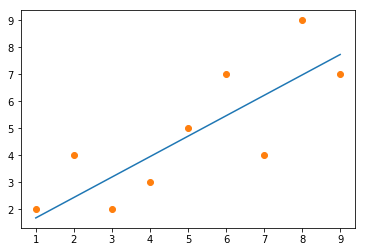

22.0651068739


In [23]:
# Hier den Code zur Berechnung des Fehlers einfuegen

x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([2,4,2,3,5,7,4,9,7])
a0 = 667/716
a1 = 541/716
plt.plot(x,a0+a1*x)
plt.plot(x,y,'o')
pylab.show()

print(np.linalg.norm(np.array([[y],[a0+a1*x]])))


$d)$ Geben Sie eine Laufzeit-Abschätzung für die Berechnung des linearen Modells an.

Komplexitätsklasse entspricht ...

### Aufgabe 2: Lineare Regression mit Python

**Führen Sie auf Grundlage des Datensatzes aus Aufgabe 1 eine lineare Regression mit Hilfe von Python durch und überprüfen Sie ihr zuvor gefundenes Modell auf Korrektheit.**

$a)$ Importieren Sie den Datensatz *LinReg.csv* wie üblich aus ihrem *data*-Ordner.

In [ ]:
# Hier den Sourcode einfuegen

$b)$ Lesen Sie z.B. unter http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html nach wie eine Lineare Regression mit Python zu realisieren ist und führen Sie diese mit den Daten des LinReg Datensatzes durch.

In [ ]:
# Hier den Sourcode einfuegen

$c)$ Werten Sie das gelernte Modell anhand des Datensatzes aus. Berechnen Sie folgende Kennwerte:
1. root mean squared error
2. absolute error
3. relative error
4. correlation

Kennwerte:

In [ ]:
# Hier den Sourcode einfuegen

$d)$ Visualisieren Sie die Regressionsgerade und passen Sie die Achsenlimits entsprechend an die Enthaltenen Werte an:

In [ ]:
# Hier den Sourcode einfuegen

## Aufgabe 3:

Eine polynomiale Regression stellt eine Spezialform einer linearen Regression dar, in welcher der Zusammenhang zwischen den $\textbf{x}$-Werten und $\textbf{y}$ mittels eines Polynoms *n*-ter Ordnung modelliert wird. Gegeben seien wiederum $m$ Datenpunkte und gesucht ist somit ein Polynom $p(x)$ mit Grad $n < m-1$, so dass der quadratische Fehler 
$ \sum_{i=0}^m {p((x_i)-y_i)}^2$ minimal wird. Die unbekannten Koeffizienten $a_0,a_1,\cdots,a_n$ des entsprechenden linearen Modells
$y_i = a_0 + a_1*x_i + a_2*x_i^2 + a_3*x_i^3 + \cdots + a_n*x_i^n$ mit $i=1..m$, können mit Hilfe eines Least-Squares-Ansatzes gefunden werden. Hierzu muss das Modell als ein System von linearen Gleichungen geschrieben werden (Matrixschreibweise $\textbf{y} = \textbf{X} * \textbf{a}$):

$\underbrace{\begin {bmatrix} y_1 \\ y_2 \\ \vdots \\ y_m \end{bmatrix}}_{\textbf{y}} = \underbrace{\begin{bmatrix} 1 & x_1 & x_1 ^ 2 & \dots & x_1 ^ n \\ 1 & x_2 & x_2^2 & \dots & x_2^n \\ \vdots & \vdots & \vdots & & \vdots \\ 1 & x_m & x_m^2 & \dots & x_m^n \end{bmatrix}}_{\textbf{X}} * \underbrace{\begin{bmatrix} a_0 \\ a_1 \\ a_2 \\ \vdots \\ a_n \end{bmatrix}}_{\textbf{a}}$ 

Der kleinste-Quadrate-Ansatz fährt so zu einem linearem Ausgleichsproblem der Form $\min_{\textbf{a}}||\textbf{X}*\textbf{a} - \textbf{y}||^{2}$.

In Python können Sie die polynomiale Regression durchführen, indem Sie die Matrix für die lineare Regression um die entsprechenden Polynome erweitern.

Zum Testen Ihres Modells verwenden Sie die Datensätze *PolyReg.csv* und *PolyReg2.csv*, die sie in ihren *data*-Ordner kopieren. Beantworten Sie nachfolgende Fragen:

1. Welche Kennwerte(RMSE, abs. Fehler,...) liefert das polynomielle Modell bei einem Polynomgrad von $n=1$ auf den zwei Datensätzen?
2. Variieren Sie den Polynomgrad um für jeden der zwei Datensätze den "am besten passenden" Polynomgrad, im Sinne der Kennwerte, zu ermitteln. Begründen Sie Ihre Entscheidung. Erweitern Sie die Methode aus $3.1$ nach Möglichkeit zu einer Funktion, damit sie möglichst einfach die Koeffizienten für höhere Grade bestimmen können.
3. Zusatzfrage: Warum stellt ein polynomiales Regressionsmodell ein lineares Modell dar?

In [24]:
# Hier den Sourcode einfuegen fuer 3.1

In [ ]:
# Hier den Sourcode einfuegen fuer 3.2

$3.3:$ Ein polynomiale Regression entspricht einem linearen Modell, da ...